## Homework 6

### Part 1

1. What are the advantages of a CNN over a fully connected deep neural network for image classification ?

The main advantage of CNN over NN for image classification is that CNN learns local patterns such as edges and textures. Fully connected neural networks learn global patterns. Many times the same pattern appears in different areas of the image. So, it is easier for CNN to recognize these patterns. 

2. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride ?

Because the max pooling layer will help to extract the features we need. Also, it will decrease the size of the image and remove invariances like shift, rotaional and scale. One more convolution layer with the same stride will not help improve the performance. 

3. When would you want to add a local response normalization layer ?

The use of local response normalization layer is used to encourage lateral inhibition. It is used when we are using Relu neurons.  
It applies its normalization effect to the previous layer. So we would add it after the layer we want normalized. 

4. Test below CNN codes with MNIST data set and show the model accuracy.

The test accuracy is 0.99299

5. Make comments on your results in step 4. 

Adding LeakyRelu makes the model have a better validation accuracy and the model learns faster.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

/tmp/ipykernel_98066/2280024188.py:4: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic(u'matplotlib inline')


In [17]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model

In [18]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, LeakyReLU 
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

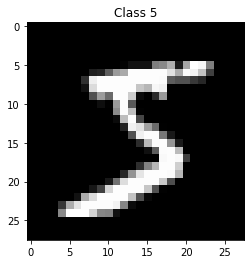

In [20]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [21]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [22]:

number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [23]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

In [24]:
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

In [25]:
# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                      

In [27]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [28]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [29]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)


In [30]:
# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
 validation_data=test_generator, validation_steps=10000//64)



Epoch 1/5


/tmp/ipykernel_98066/3943533804.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5,


937/937 [==============================] - 36s 39ms/step - loss: 0.1977 - accuracy: 0.9366 - val_loss: 0.0331 - val_accuracy: 0.9890
Epoch 2/5
937/937 [==============================] - 36s 38ms/step - loss: 0.0617 - accuracy: 0.9809 - val_loss: 0.0191 - val_accuracy: 0.9930
Epoch 3/5
937/937 [==============================] - 37s 40ms/step - loss: 0.0466 - accuracy: 0.9851 - val_loss: 0.0204 - val_accuracy: 0.9939
Epoch 4/5
937/937 [==============================] - 36s 39ms/step - loss: 0.0398 - accuracy: 0.9880 - val_loss: 0.0223 - val_accuracy: 0.9928
Epoch 5/5
937/937 [==============================] - 35s 38ms/step - loss: 0.0343 - accuracy: 0.9895 - val_loss: 0.0164 - val_accuracy: 0.9936


In [31]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])


313/313 [==============================] - 1s 4ms/step - loss: 0.0164 - accuracy: 0.9936

Test accuracy:  0.9936000108718872


In [32]:

predictions = model.predict(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)


313/313 [==============================] - 1s 4ms/step


In [33]:
predictions

[array([5.1673939e-12, 1.6726190e-09, 5.1435953e-09, 7.0259779e-07,
        1.8701291e-08, 5.4867316e-10, 3.0256078e-14, 9.9999863e-01,
        2.3518243e-10, 5.3692423e-07], dtype=float32),
 array([1.8076862e-09, 2.2067094e-10, 9.9999982e-01, 3.5706699e-10,
        1.8403465e-09, 1.1757251e-13, 1.2693857e-07, 1.4355184e-08,
        1.9036246e-09, 3.8358493e-11], dtype=float32),
 array([4.8870032e-09, 9.9998254e-01, 1.0095251e-06, 1.5928595e-10,
        2.4825968e-06, 4.0896975e-09, 6.6043668e-08, 1.3495168e-05,
        2.4127792e-07, 1.4177898e-07], dtype=float32),
 array([9.9992675e-01, 1.3412889e-09, 3.1749410e-09, 3.2144548e-10,
        6.1327626e-08, 2.1813175e-08, 7.2609459e-05, 2.5859578e-10,
        1.6682935e-07, 3.1333201e-07], dtype=float32),
 array([1.0795436e-08, 5.5177168e-08, 2.6149694e-08, 9.1135499e-09,
        9.9877477e-01, 3.0272373e-09, 7.9510869e-09, 1.4609872e-08,
        2.6384023e-07, 1.2248405e-03], dtype=float32),
 array([1.9290745e-09, 9.9999756e-01, 4.89927

## Part 2

1. Load data

In [34]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [35]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


### 2. Show the 10 classes

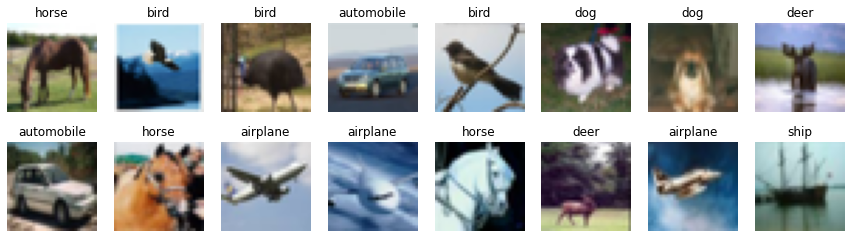

In [36]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",  "dog", "frog", "horse", "ship", "truck"]

# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

### 3. Define a CNN architecture and train your own model by playing with the network setup: like, performs convolution, performs 2D max pooling, changing activation function from ReLU to LeakyReLU, adding dropout etc. 

In [37]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.layers import LeakyReLU

In [49]:

model2 = Sequential()

# 1st CNN
model2.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model2.add(LeakyReLU(alpha=0.02))
BatchNormalization(axis=-1)
model2.add(Conv2D(32, (3, 3)))
model2.add(LeakyReLU(alpha=0.02))
model2.add(MaxPooling2D(pool_size=(2,2)))

# 2nd CNN
BatchNormalization(axis=-1)
model2.add(Conv2D(64,(3, 3)))
model2.add(LeakyReLU(alpha=0.02))
BatchNormalization(axis=-1)
model2.add(Conv2D(64, (3, 3)))
model2.add(LeakyReLU(alpha=0.02))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())

In [50]:
# Fully connected layer
BatchNormalization()
model2.add(Dense(512))
model2.add(LeakyReLU(alpha=0.02))
BatchNormalization()
model2.add(Dropout(0.2))
model2.add(Dense(10))

In [51]:
# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model2.add(Activation('softmax'))


In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 64)        18496     
                                                      

In [53]:
model2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [54]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [55]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)


In [56]:
model2.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
 validation_data=test_generator, validation_steps=10000//64)



Epoch 1/5


/tmp/ipykernel_98066/634991468.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5,


937/937 [==============================] - 37s 39ms/step - loss: 0.1973 - accuracy: 0.9358 - val_loss: 0.0459 - val_accuracy: 0.9862
Epoch 2/5
937/937 [==============================] - 38s 40ms/step - loss: 0.0588 - accuracy: 0.9824 - val_loss: 0.0274 - val_accuracy: 0.9910
Epoch 3/5
937/937 [==============================] - 40s 42ms/step - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.0225 - val_accuracy: 0.9927
Epoch 4/5
937/937 [==============================] - 40s 43ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0249 - val_accuracy: 0.9926
Epoch 5/5
937/937 [==============================] - 38s 41ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0208 - val_accuracy: 0.9933


In [57]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.0170 - accuracy: 0.9951

Test accuracy:  0.9951000213623047


In [58]:

predictions = model.predict(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)


313/313 [==============================] - 1s 5ms/step
